In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
import numpy as np
from scipy.stats import pearsonr, linregress

server_data = np.load('./真实线路数据.npy')

In [15]:
server_data.shape

(4241, 4, 308, 2)

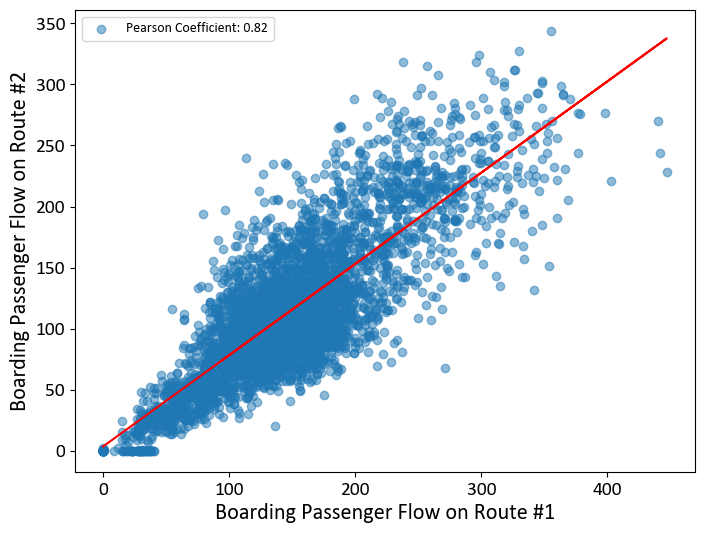

In [16]:
station0 = 2  # 线路
station1 = 6
x = server_data[:, 0, station0, 0].reshape(-1)
y = server_data[:, 0, station1, 0].reshape(-1)

# 计算皮尔逊相关系数
route_correlation, _ = pearsonr(x, y)

# 使用 scipy 的 linregress 计算回归线参数
slope, intercept, _, _, _ = linregress(x, y)
# 创建散点图
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'Calibri'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Boarding Passenger Flow on Route #1', fontsize=16)
plt.ylabel('Boarding Passenger Flow on Route #2', fontsize=16)

plt.scatter(x, y, alpha=0.5,
            label=f'Pearson Coefficient: {route_correlation:.2f}')
# 添加回归线
plt.plot(x, intercept + slope * x, color='red')
# 添加图例
plt.legend()
plt.show()
fig.savefig('./route-correlation.svg', bbox_inches='tight')

In [17]:
route_correlation

0.8155744406737491

In [18]:
station_data = np.load('./真实站点数据.npy')

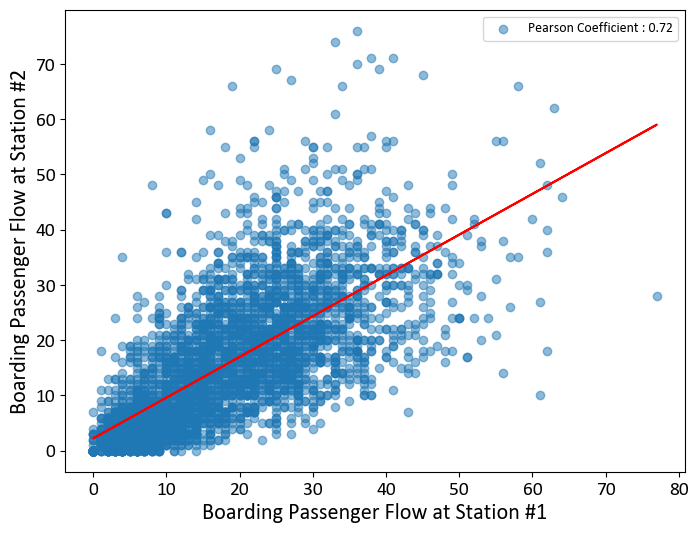

In [19]:
station0 = 1  # 线路
station1 = 2
x = station_data[:, 0, station0, 0].reshape(-1)
y = station_data[:, 0, station1, 0].reshape(-1)

# 计算皮尔逊相关系数
station_correlation, _ = pearsonr(x, y)

# 使用 scipy 的 linregress 计算回归线参数
slope, intercept, _, _, _ = linregress(x, y)
# 创建散点图
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'Calibri'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Boarding Passenger Flow at Station #1', fontsize=16)
plt.ylabel('Boarding Passenger Flow at Station #2', fontsize=16)

plt.scatter(x, y, alpha=0.5,
            label=f'Pearson Coefficient : {station_correlation:.2f}')
# 添加回归线
plt.plot(x, intercept + slope * x, color='red')
# 添加图例
plt.legend()
plt.show()
fig.savefig('./station-correlation.svg', bbox_inches='tight')

In [20]:
station_correlation

0.7179830372570866